# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

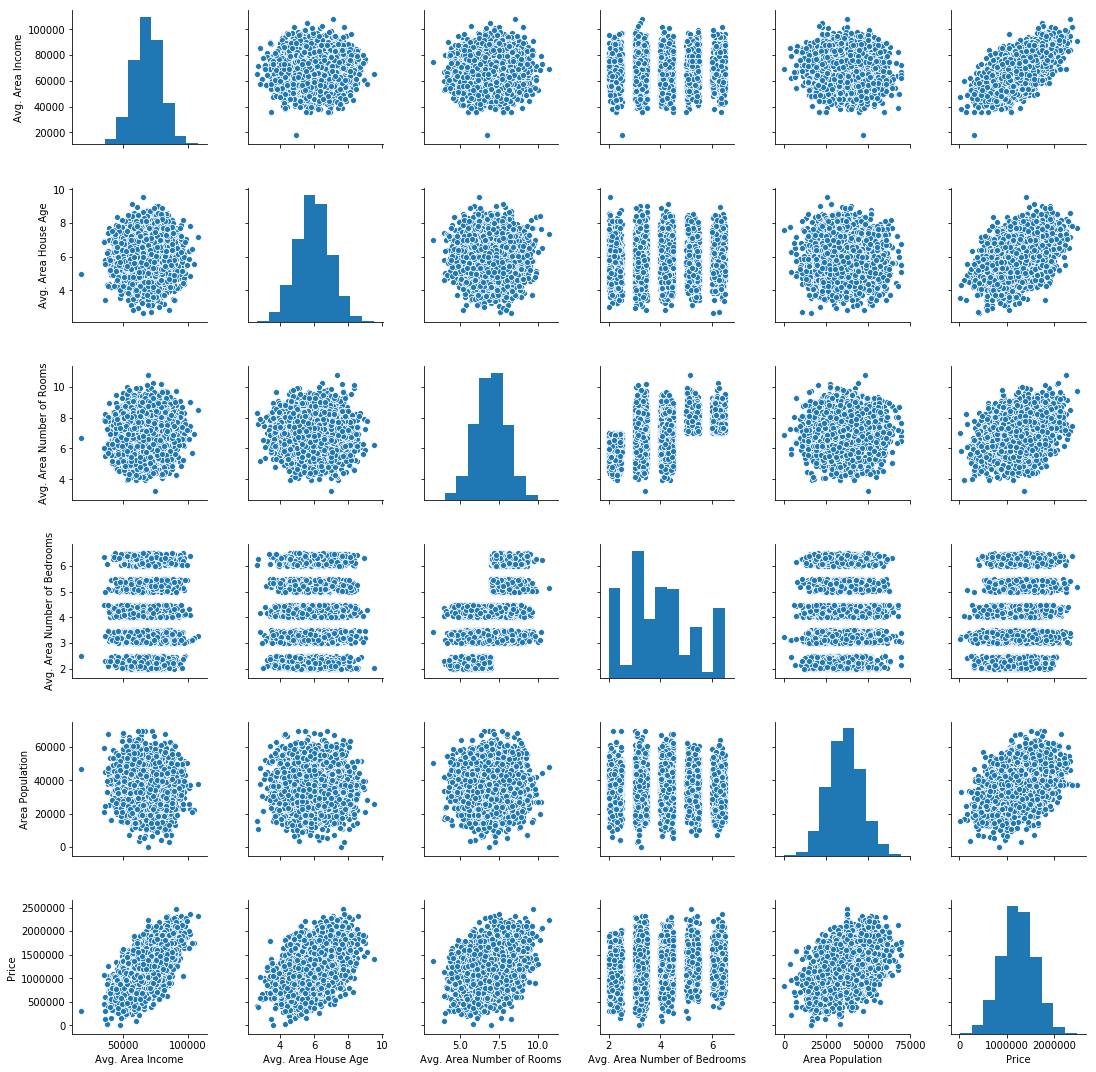

In [7]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


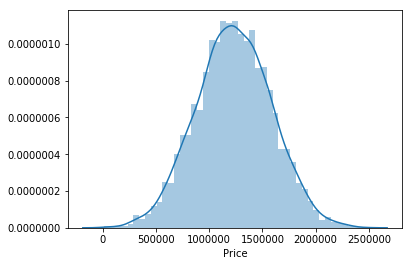

In [8]:
sns.distplot(df['Price'])

In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


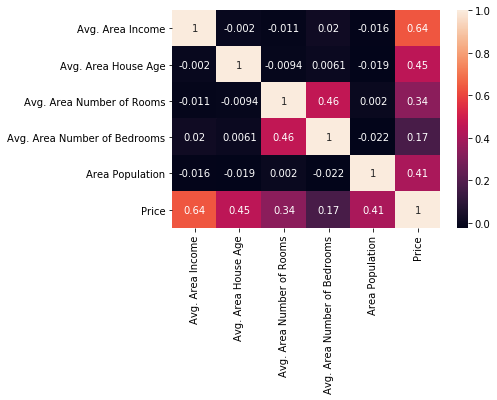

In [11]:
sns.heatmap(df.corr(), annot = True)

In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [18]:
y = df['Price']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(lm.intercept_)

-2640159.796851911


In [95]:
lm.coef_ # coeffs for each feature

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [28]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [30]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])

In [31]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [32]:
'''coef is - if all the other features are kept as constant
then for eg if avg. area income is increased by one unit the 
it would ince the y variable , ie, price by 21 dollar 5 cents'''

'coef is - if all the other features are kept as constant\nthen for eg if avg. area income is increased by one unit the \nit would ince the y variable , ie, price by 21 dollar 5 cents'

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [44]:
#print(boston['DESCR'])

In [43]:
#print(boston['data'])

In [42]:
#print(boston['feature_names'])

In [41]:
#print(boston['target'])

In [45]:
predictions = lm.predict(X_test)

In [46]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [47]:
y_test # we want how far off predictions and y_test are; should be closer to a stright line

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

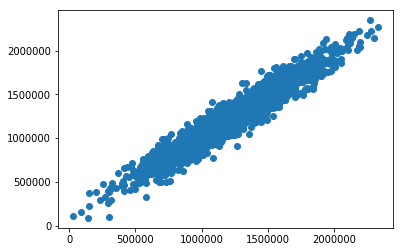

In [49]:
plt.scatter(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


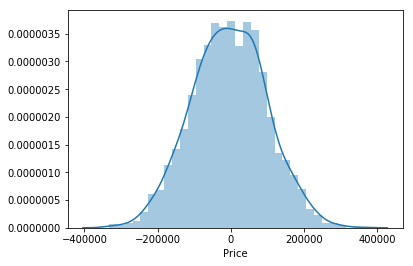

In [50]:
sns.distplot((y_test - predictions))

In [51]:
# residuals are normally distributed which is favourable

In [52]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [54]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [55]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

# Linear Regression - Exercise


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
customers = pd.read_csv("Ecommerce Customers.txt")

In [146]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [147]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [148]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


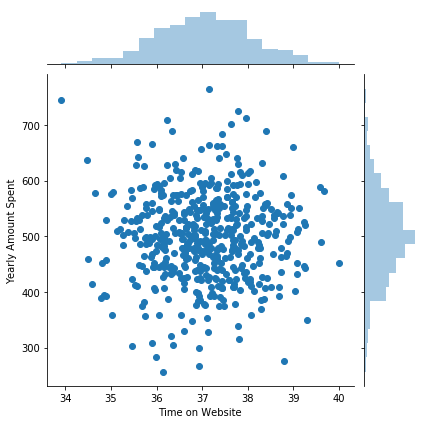

In [149]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Yearly Amount Spent')

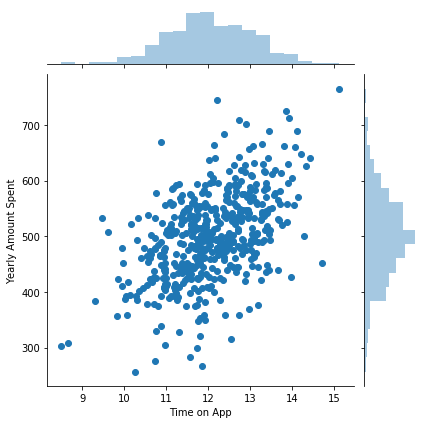

In [150]:
sns.jointplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent')

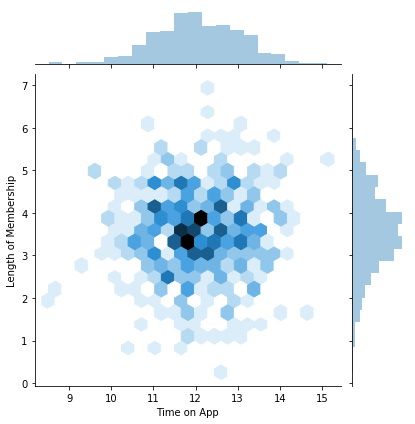

In [151]:
sns.jointplot(x='Time on App', y = 'Length of Membership', kind = 'hex', data = customers)

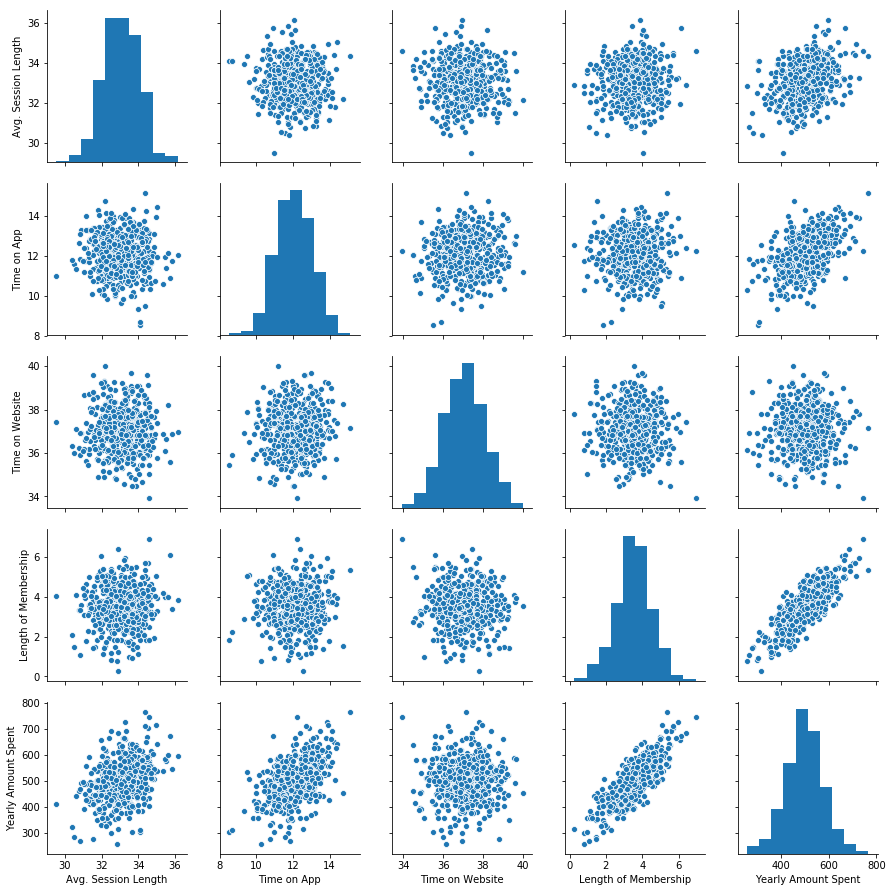

In [152]:
sns.pairplot(customers)

In [153]:
#legnth of membership seems to be the most correlated

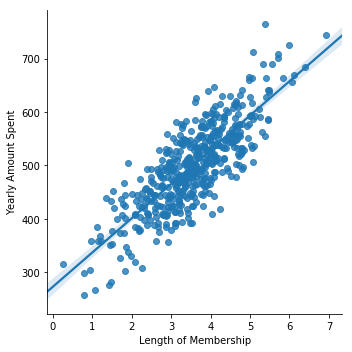

In [154]:
sns.lmplot(y='Yearly Amount Spent', x = 'Length of Membership', data = customers)

In [155]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [156]:
y = customers['Yearly Amount Spent']

In [173]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lm = LinearRegression()

In [178]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [180]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'predicted values')

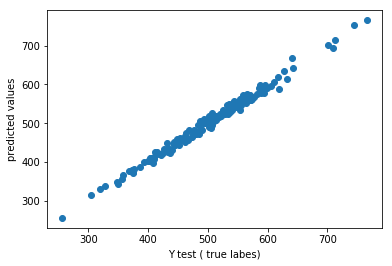

In [181]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test ( true labes)')
plt.ylabel('predicted values')

In [182]:
from sklearn import metrics

In [183]:
print('MAE',metrics.mean_absolute_error(y_test, predictions))

MAE 7.228148653430853


In [184]:
print('MSE',metrics.mean_squared_error(y_test, predictions))

MSE 79.81305165097487


In [185]:
print('MAE',np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE 2.688521648309876


In [186]:
metrics.explained_variance_score(y_test, predictions)# R squared

0.9890771231889606

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


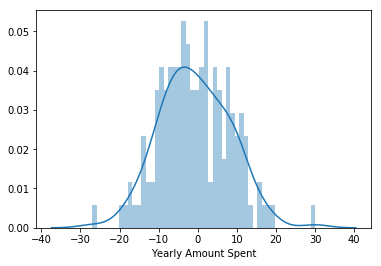

In [187]:
sns.distplot((y_test-predictions), bins = 50)

In [188]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Logistic Regresion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


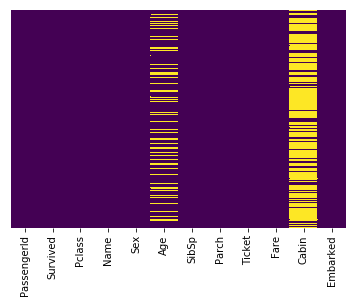

In [4]:
sns.heatmap(train.isnull(), yticklabels= False,cbar = False, cmap = 'viridis')

In [5]:
sns.set_style('whitegrid')

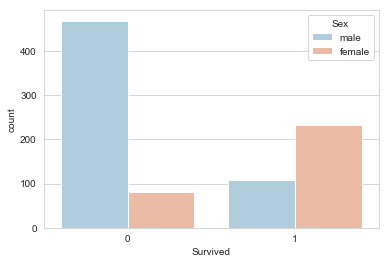

In [6]:
sns.countplot(x='Survived', data = train, hue = 'Sex', palette = 'RdBu_r')

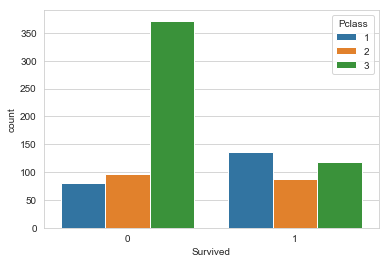

In [7]:
sns.countplot(x='Survived', data = train, hue = 'Pclass')

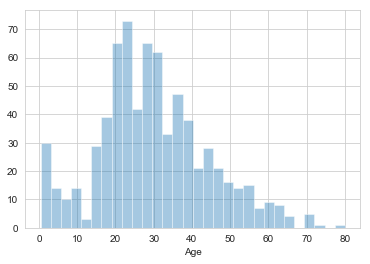

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins = 30)

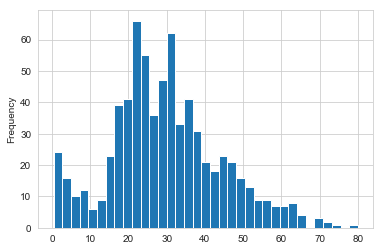

In [9]:
train['Age'].plot.hist(bins = 35)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


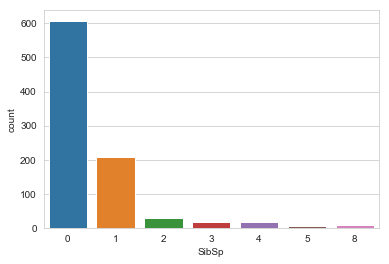

In [11]:
sns.countplot(x = 'SibSp', data = train)

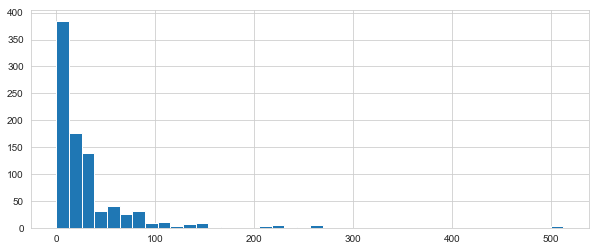

In [12]:
train['Fare'].hist(bins = 40, figsize = (10,4))

In [13]:
#!pip install cufflinks
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind = 'hist', bins = 50)

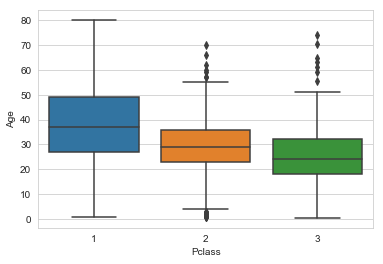

In [15]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:return 24
        
    else:
        return Age
    

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

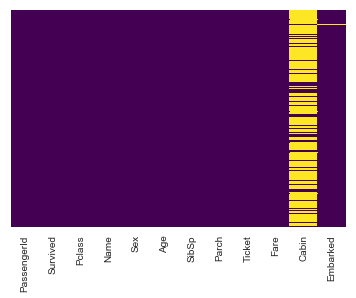

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False, cmap = 'viridis')

In [25]:
train.drop('Cabin', axis = 1, inplace = True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


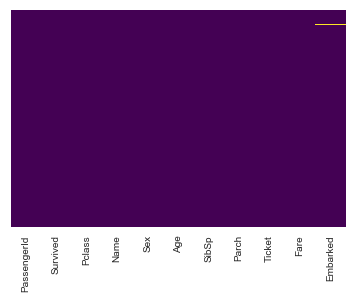

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False, cmap = 'viridis')

In [28]:
train.dropna(inplace = True)

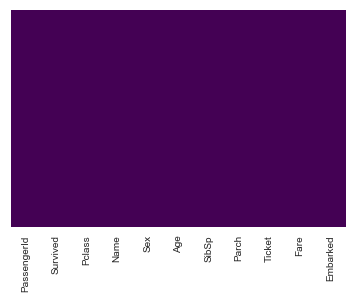

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False, cmap = 'viridis')

In [33]:
#pd.get_dummies(train['Sex'])
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [34]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [37]:
train = pd.concat([train, sex, embark], axis = 1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [40]:
train.drop(['Sex', 'Embarked','Name','Ticket'],axis = 1, inplace = True)

In [44]:
train.tail(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
888,0,3,24.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [43]:
train.drop(['PassengerId'], axis = 1, inplace = True)

In [45]:
pclass = pd.get_dummies(train['Pclass'], drop_first = True)
train = pd.concat([train, pclass], axis = 1)

In [48]:
train.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


In [47]:
train.drop(['Pclass'], axis = 1, inplace = True)

In [52]:
train[3].head()

0    1
1    0
2    1
3    0
4    1
Name: 3, dtype: uint8

In [55]:
train.rename(columns = {2 : 'classtwo'}, inplace = True)

In [56]:
train.rename(columns = {3: 'classthree'}, inplace = True)

In [57]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,classtwo,classthree
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [58]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()

In [63]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 36,  68]], dtype=int64)

# Logistic Regression Project

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
addata = pd.read_csv('advertising.csv')

In [74]:
addata.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [75]:
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [76]:
addata.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


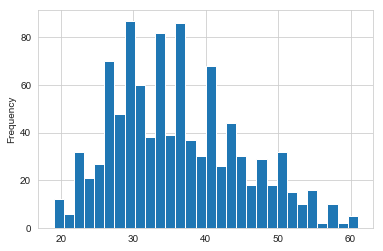

In [80]:
addata['Age'].plot.hist(bins = 30)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



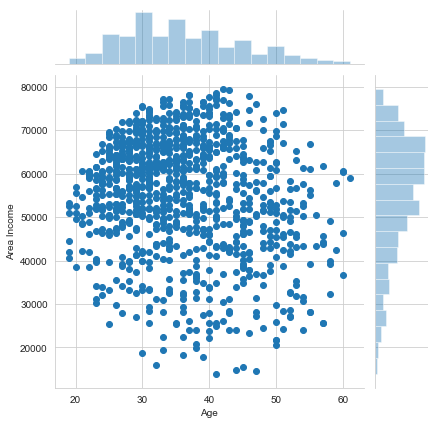

In [82]:
sns.jointplot(x = "Age", y = 'Area Income', data = addata)

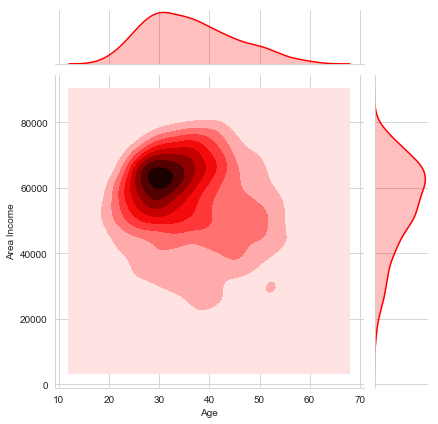

In [84]:
sns.jointplot(x = "Age", y = 'Area Income', data = addata, kind = 'kde', color = 'red')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



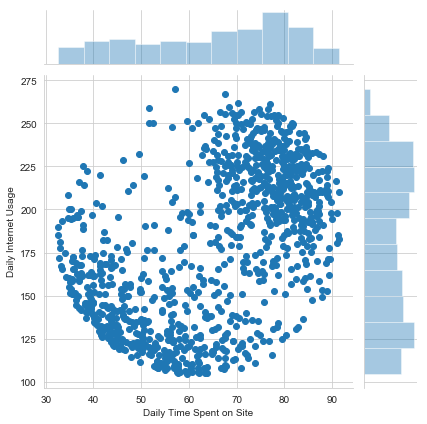

In [86]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = addata)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



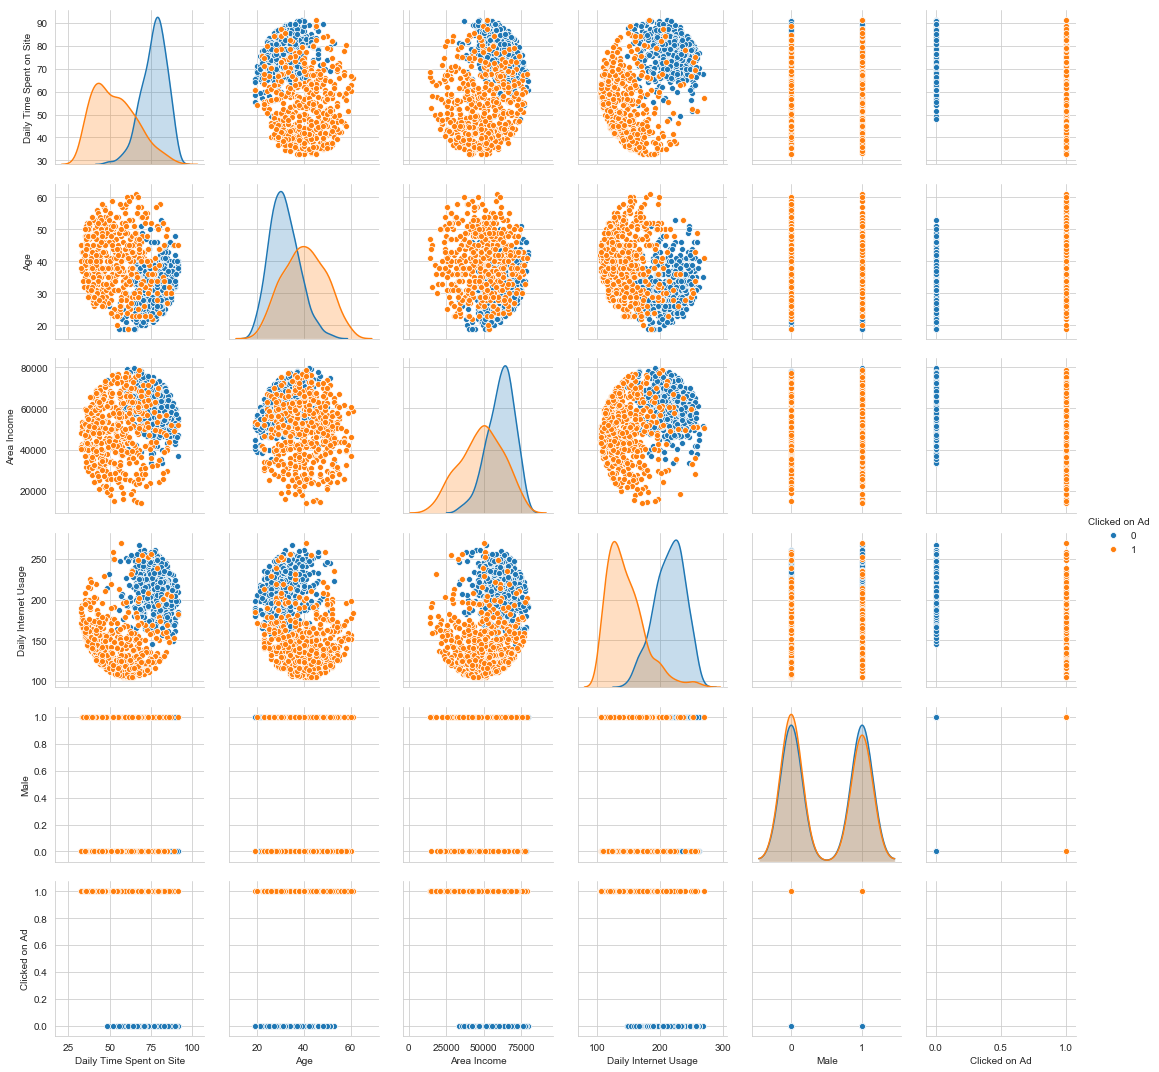

In [89]:
sns.pairplot(addata, hue = 'Clicked on Ad')

In [92]:
from sklearn.model_selection import train_test_split


In [97]:
X = addata[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y = addata[['Clicked on Ad']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

In [95]:
addata.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()

In [100]:
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
predictions = logmodel.predict(X_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print((classification_report(y_test,predictions)))
print((confusion_matrix(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149   8]
 [ 15 128]]
